In [8]:
#Importando librerias utiles
import numpy as np
import matplotlib.legend
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [9]:
#Definiendo la función calcular distancias
def distancia(x,y):
    s1 = (x[0]-y[0])**2
    s2 = (x[1]-y[1])**2
    s3 = (x[2]-y[2])**2
    return np.sqrt(s1 + s2 + s3)

In [10]:
def dist(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2)

In [11]:
#Importando datos
datos = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/data_10K.dat')
rand = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/rand0_10K.dat')
#longitud de la lista datos es la cantidad total de datos
N=len(datos)

In [12]:
#Definiendo numero de particiones y distancia de interés
n = 30
d_max = 180

In [13]:
#Creando archivo de Posiciones x (punto medio) e histogramas 
x=[]
DD=[]
DR=[]
RR=[]
for i in range(n):
    x.append((i+1/2)*d_max/n)
    DD.append(0)
    DR.append(0)
    RR.append(0)
#pasamos la lista x a un array 
x = np.array(x)
print(x)

[  3.   9.  15.  21.  27.  33.  39.  45.  51.  57.  63.  69.  75.  81.
  87.  93.  99. 105. 111. 117. 123. 129. 135. 141. 147. 153. 159. 165.
 171. 177.]


In [14]:
#Calculo de las distancias 
to=timer()
for i in range(N-1):
    for j in range(i+1,N):
        d_d=distancia(datos[i],datos[j])
        d_r=distancia(rand[i],rand[j])
        if d_d < d_max:
            DD[int(d_d*n/d_max)]+=2
        if d_r < d_max:
            RR[int(d_r*n/d_max)]+=2         
tf=timer()
print(tf-to)

517.3849740529986


In [15]:
to=timer()
for i in range(N):
    for j in range(N):
        d=distancia(datos[i],rand[j])
        if d<d_max:
            DR[int(d*n/d_max)]+=1
tf=timer()
print(tf-to)

522.1994482139999


In [16]:
#Construyendo los estimadores 
DD=np.array(DD)
DR=np.array(DR)
RR=np.array(RR)
LS=(DD-2*DR+RR)/RR
HAM=(DD*RR)/(DR**2)-1

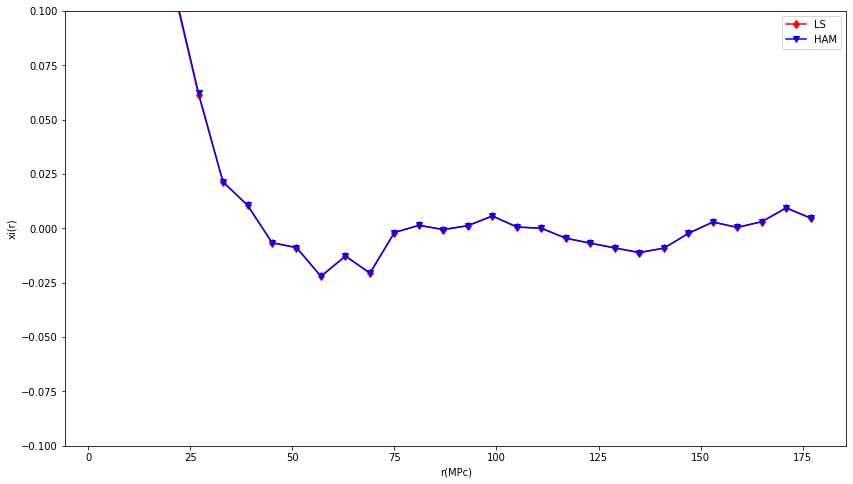

In [17]:
#Graficando
figura = matplotlib.pyplot.gcf()
plt.plot(x,LS,linestyle='-',color='r',marker='d',label='LS')
plt.plot(x,HAM,linestyle='-',color='b',marker='v',label='HAM')
plt.xlabel('r(MPc)')
plt.ylabel('xi(r)')
figura.set_size_inches(14,8)
#graficando solo en el rango de -1 a 1
plt.ylim(-.1,.1)
plt.legend()
plt.savefig('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/grafica10K.png',bbox_inches='tight')
plt.show() 